In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
from itertools import repeat

from matplotlib import pyplot as plt

In [7]:
# Get all files
hamming_results_path = '../hamming/'
data_files = os.listdir(hamming_results_path)

In [8]:
# Join the paths into an array so that the dfs could be read
file_paths = zip(repeat(hamming_results_path, len(data_files)), data_files)
file_paths = map("".join, file_paths)
dfs = [pd.read_csv(fps) for fps in file_paths]

# Combine into one dataframe
df = pd.concat(dfs)

# Confirm that there are as many results as expected
assert len(df) / len(set(df['Neighborhood min dist'])) == 1280

In [4]:
df.head()

,Neighborhood min dist,Num neighbors,Treatment/Control Radius,Treatment %,Control %,Match Radius,Treatment Count,Control Count,ATE,TE Std,Average Match Distance
0,500,5,5,0.6,0.6,0.5,351,351,0.846724,1.351385,0.255649
1,500,5,5,0.6,0.6,1.0,351,351,0.921880,1.299982,0.250576
2,500,5,5,0.6,0.6,1.5,351,351,1.132963,1.327205,0.247695
3,500,5,5,0.6,0.6,2.0,351,351,1.332251,1.402969,0.246186
4,500,5,5,0.6,0.7,0.5,351,351,0.943789,1.394741,0.257628


In [5]:
df.columns

Index(['Neighborhood min dist', 'Num neighbors', 'Treatment/Control Radius',
       'Treatment %', 'Control %', 'Match Radius', 'Treatment Count',
       'Control Count', 'ATE', 'TE Std', 'Average Match Distance'],
      dtype='object')

<AxesSubplot: xlabel='Control %', ylabel='Treatment %'>

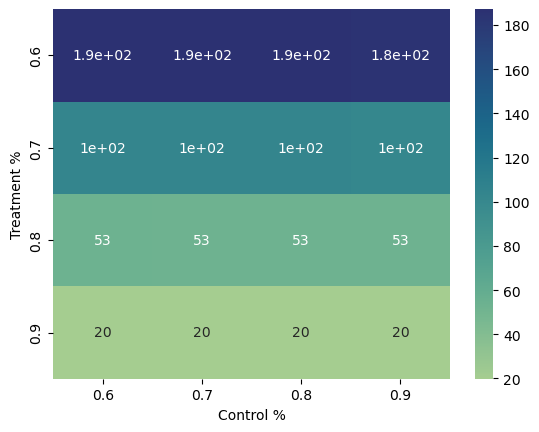

In [4]:
sb.heatmap(pd.pivot_table(df, values='Treatment Count', index='Treatment %', columns='Control %', aggfunc='mean'), annot=True, cmap='crest')

<AxesSubplot: xlabel='Treatment %', ylabel='Treatment Count'>

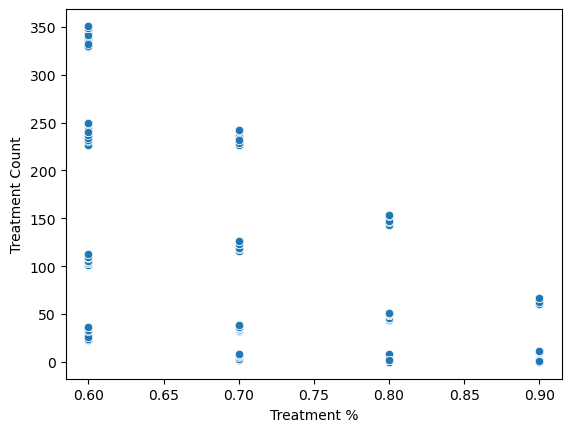

In [9]:
sb.scatterplot(df, x='Treatment %', y='Treatment Count')

# Let's do some very simple analysis

<AxesSubplot: xlabel='Treatment/Control Radius', ylabel='TE Std'>

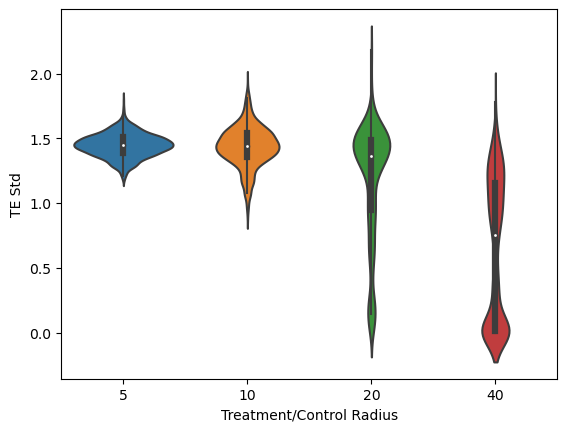

In [74]:
sb.violinplot(df, x = 'Treatment/Control Radius', y='TE Std')

<AxesSubplot: xlabel='Treatment/Control Radius', ylabel='Treatment Count'>

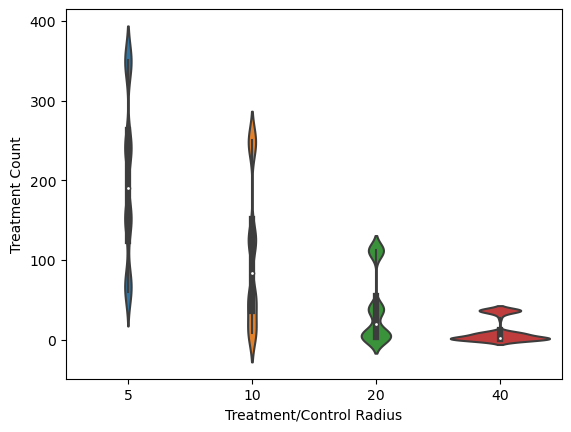

In [75]:
sb.violinplot(df, x = 'Treatment/Control Radius', y='Treatment Count')

<AxesSubplot: xlabel='Neighborhood min dist', ylabel='ATE'>

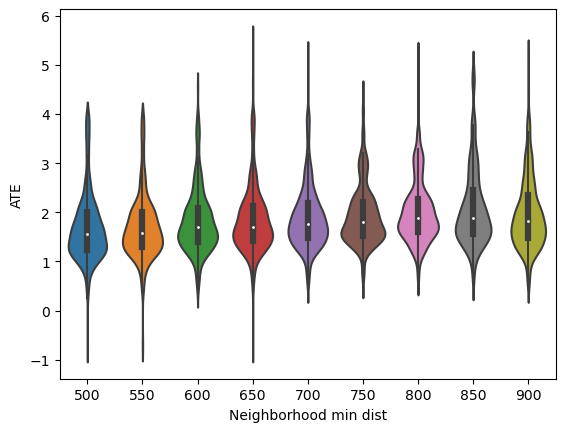

In [6]:
# Let's create a boxplot of ATE, based on Neighborhood min dist
import seaborn as sb

sb.violinplot(df, x = 'Neighborhood min dist', y='ATE')

<AxesSubplot: xlabel='Treatment %', ylabel='ATE'>

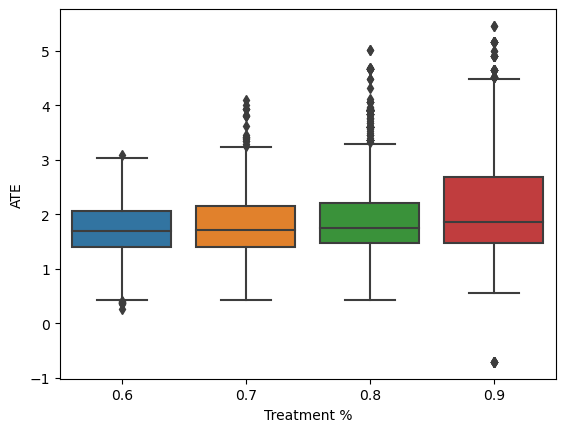

In [7]:
sb.boxplot(df, x = 'Treatment %', y='ATE')

<AxesSubplot: xlabel='Control %', ylabel='Treatment %'>

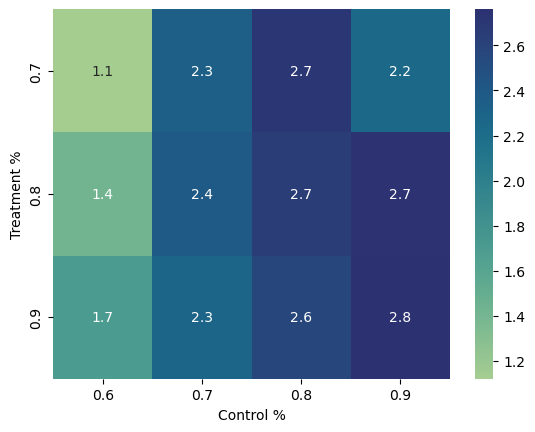

In [16]:
sb.heatmap(pd.pivot_table(df, values='ATE', index='Treatment %', columns='Control %'), annot=True, cmap='crest')

<AxesSubplot: xlabel='Average Match Distance', ylabel='ATE'>

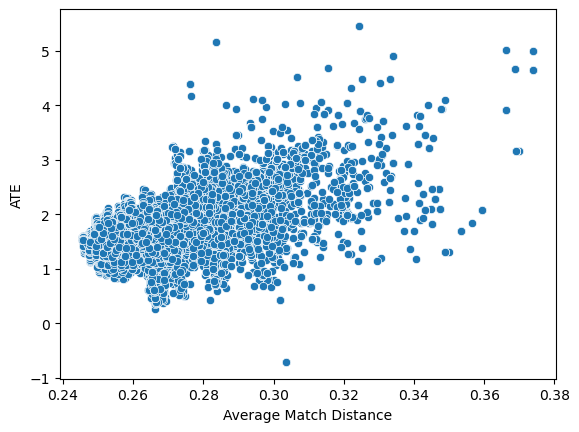

In [9]:
sb.scatterplot(df, x='Average Match Distance', y='ATE')

<AxesSubplot: xlabel='Match Radius', ylabel='Average Match Distance'>

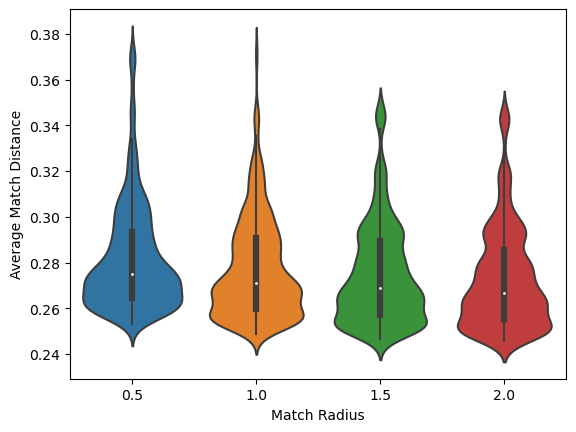

In [12]:
sb.violinplot(df, x='Match Radius', y='Average Match Distance')

<AxesSubplot: xlabel='Match Radius', ylabel='ATE'>

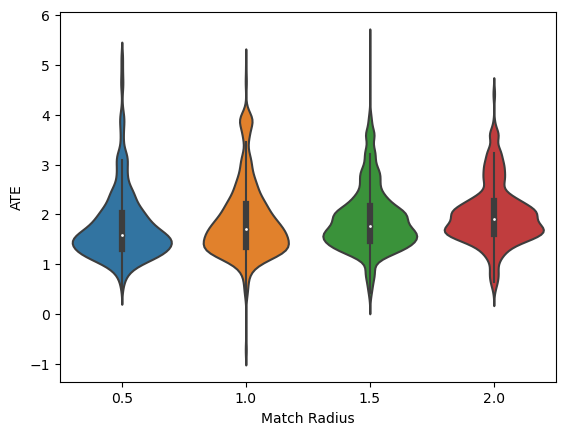

In [16]:
sb.violinplot(df, x='Match Radius', y='ATE')

<AxesSubplot: xlabel='Treatment/Control Radius', ylabel='ATE'>

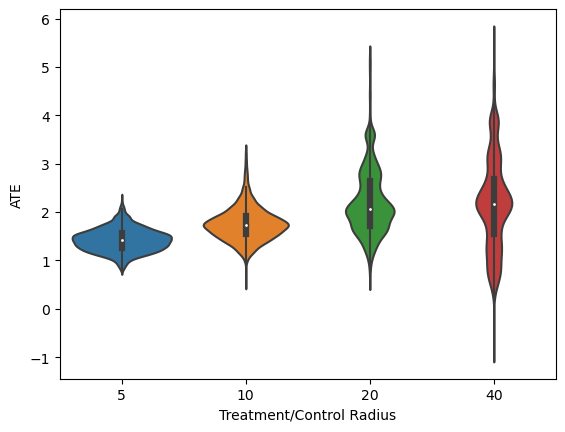

In [18]:
sb.violinplot(df, x='Treatment/Control Radius', y='ATE')

<AxesSubplot: xlabel='Treatment/Control Radius', ylabel='Average Match Distance'>

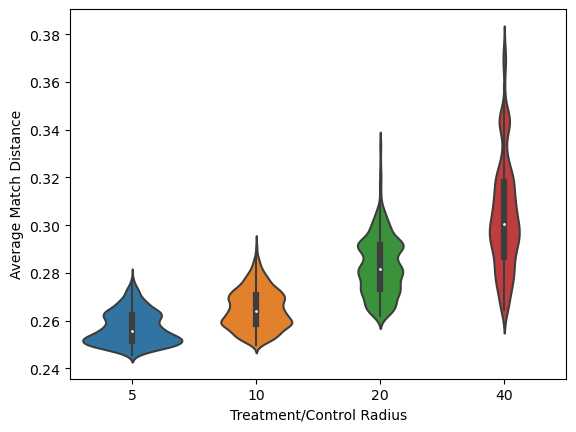

In [19]:
sb.violinplot(df, x='Treatment/Control Radius', y='Average Match Distance')

<AxesSubplot: xlabel='Num neighbors', ylabel='Average Match Distance'>

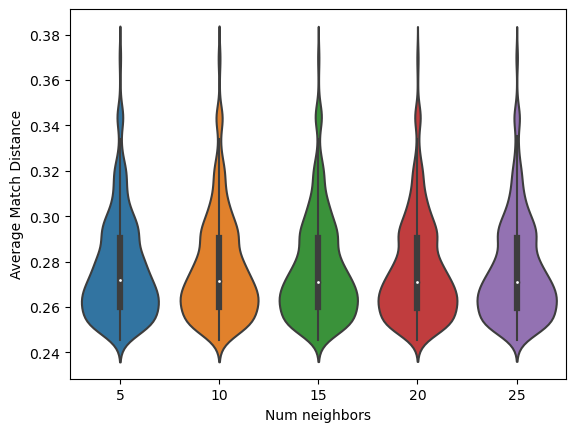

In [20]:
sb.violinplot(df, x='Num neighbors', y='Average Match Distance')

In [7]:
df.head()

,Neighborhood min dist,Num neighbors,Treatment/Control Radius,Treatment %,Control %,Match Radius,Treatment Count,Control Count,ATE,TE Std,Average Match Distance
0,500,5,5,0.6,0.6,0.5,351,351,0.846724,1.351385,0.255649
1,500,5,5,0.6,0.6,1.0,351,351,0.921880,1.299982,0.250576
2,500,5,5,0.6,0.6,1.5,351,351,1.132963,1.327205,0.247695
3,500,5,5,0.6,0.6,2.0,351,351,1.332251,1.402969,0.246186
4,500,5,5,0.6,0.7,0.5,351,351,0.943789,1.394741,0.257628


<AxesSubplot: xlabel='Treatment Count', ylabel='ATE'>

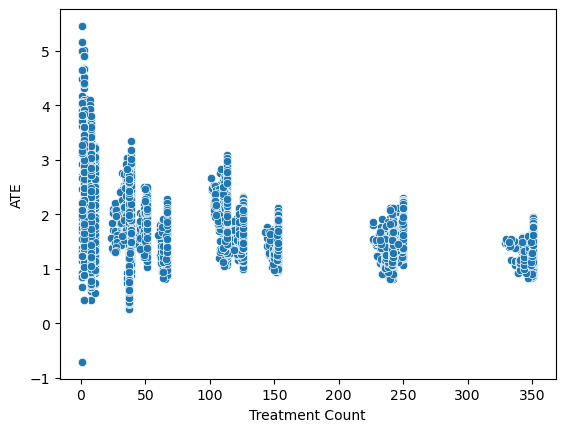

In [11]:
sb.scatterplot(df, x = 'Treatment Count', y='ATE')

<AxesSubplot: xlabel='Treatment %', ylabel='Treatment Count'>

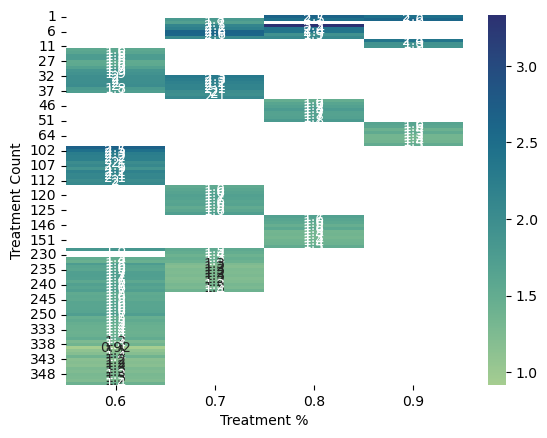

In [12]:
sb.heatmap(pd.pivot_table(df, values='ATE', index='Treatment Count', columns='Treatment %'), annot=True, cmap='crest')

For a better analysis, we should ignore examples where the treatment count < 20

<AxesSubplot: xlabel='Control %', ylabel='Treatment %'>

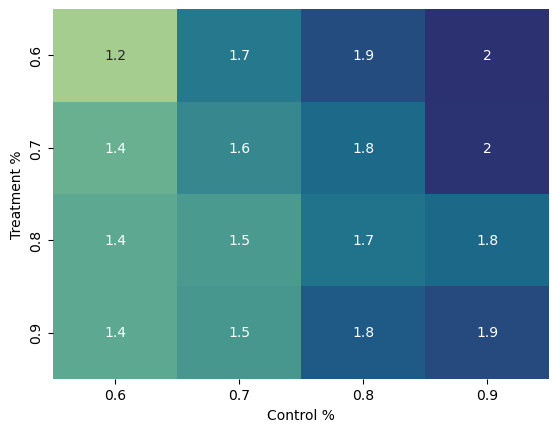

In [39]:
df2 = df[df['Treatment Count'] > 10]
sb.heatmap(pd.pivot_table(df2, values='ATE', index='Treatment %', columns='Control %'), cbar=False, annot=True, cmap='crest')
# sb.colorbar(False)

<AxesSubplot: xlabel='Control %', ylabel='Treatment %'>

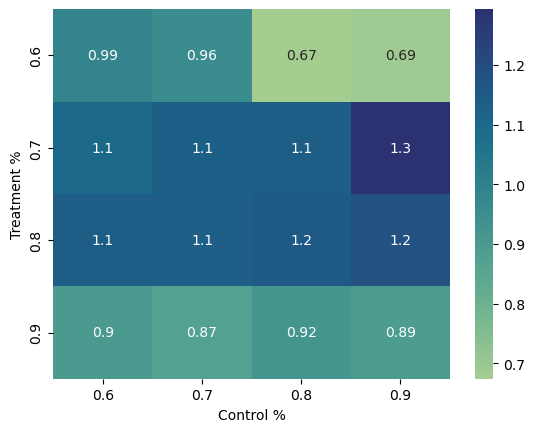

In [27]:
sb.heatmap(pd.pivot_table(df2, values='TE Std', index='Treatment %', columns='Control %', aggfunc='min'), annot=True, cmap='crest')

In [23]:
df2['TE Std'].min()

0.6742850554562813

In [19]:
df2.head()

,Neighborhood min dist,Num neighbors,Treatment/Control Radius,Treatment %,Control %,Match Radius,Treatment Count,Control Count,ATE,TE Std,Average Match Distance
0,500,5,5,0.6,0.6,0.5,351,351,0.846724,1.351385,0.255649
1,500,5,5,0.6,0.6,1.0,351,351,0.921880,1.299982,0.250576
2,500,5,5,0.6,0.6,1.5,351,351,1.132963,1.327205,0.247695
3,500,5,5,0.6,0.6,2.0,351,351,1.332251,1.402969,0.246186
4,500,5,5,0.6,0.7,0.5,351,351,0.943789,1.394741,0.257628


<AxesSubplot: xlabel='Treatment Count', ylabel='Treatment %'>

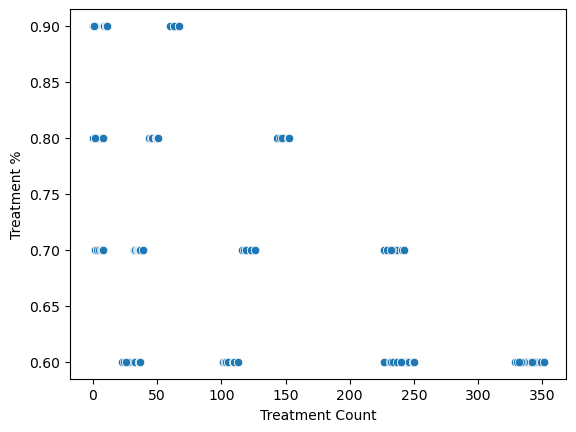

In [14]:
sb.scatterplot(df, x='Treatment Count', y='Treatment %')

# Let's look at the weighted haming results

In [41]:
# Load the data path
hamming_results_path = '/datacommons/carlsonlab/fcw/model_outputs/hamming/'
data_files = os.listdir(hamming_results_path)

# Join the paths into an array so that the dfs could be read
file_paths = zip(repeat(hamming_results_path, len(data_files)), data_files)
file_paths = map("".join, file_paths)
dfs = [pd.read_csv(fps) for fps in file_paths]

# Combine into one dataframe
df = pd.concat(dfs)

# Confirm that there are as many results as expected
# assert len(df) / len(set(df['Neighborhood min dist'])) == 1280

<AxesSubplot: xlabel='Control %', ylabel='Treatment %'>

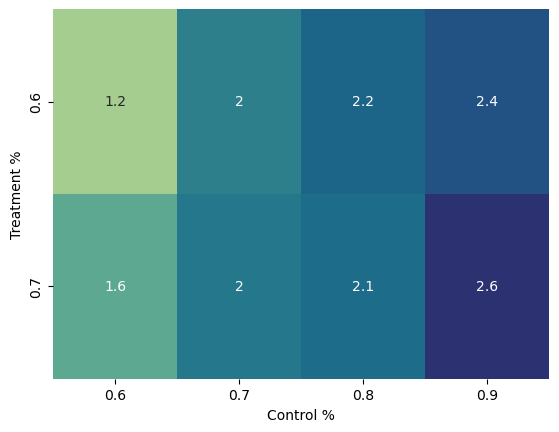

In [43]:
df2 = df[df['Treatment Count'] > 10]
sb.heatmap(pd.pivot_table(df2, values='ATE', index='Treatment %', columns='Control %'), cbar=False, annot=True, cmap='crest')

In [44]:
# Load the data path
hamming_results_path = '/datacommons/carlsonlab/fcw/model_outputs/jaccard/'
data_files = os.listdir(hamming_results_path)

# Join the paths into an array so that the dfs could be read
file_paths = zip(repeat(hamming_results_path, len(data_files)), data_files)
file_paths = map("".join, file_paths)
dfs = [pd.read_csv(fps) for fps in file_paths]

# Combine into one dataframe
df = pd.concat(dfs)

# Confirm that there are as many results as expected
# assert len(df) / len(set(df['Neighborhood min dist'])) == 1280

<AxesSubplot: xlabel='Control %', ylabel='Treatment %'>

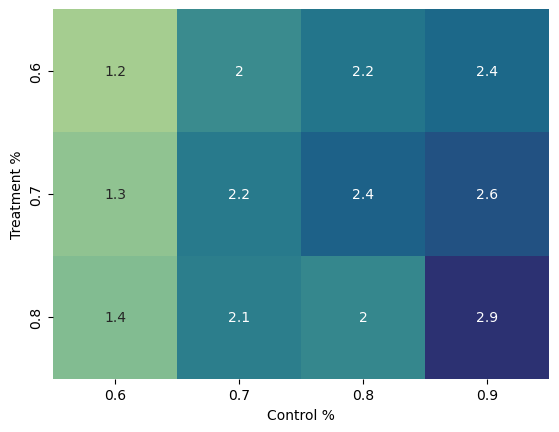

In [48]:
df2 = df[df['Treatment Count'] > 5]
sb.heatmap(pd.pivot_table(df2, values='ATE', index='Treatment %', columns='Control %'), cbar=False, annot=True, cmap='crest')

In [49]:
df2.head()

,Neighborhood min dist,Num neighbors,Treatment/Control Radius,Treatment %,Control %,Match Radius,Treatment Count,Control Count,ATE,TE Std,Average Match Distance
0,800,5,20,0.6,0.6,0.5,113,113,1.591858,1.374059,0.701286
1,800,5,20,0.6,0.6,1.0,113,113,1.780531,1.433120,0.693812
2,800,5,20,0.6,0.6,1.5,113,113,1.588673,1.416644,0.688246
3,800,5,20,0.6,0.6,2.0,113,113,1.667699,1.343208,0.686211
4,800,5,20,0.6,0.7,0.5,112,112,2.079196,1.428248,0.710671


<AxesSubplot: xlabel='Control %', ylabel='Treatment %'>

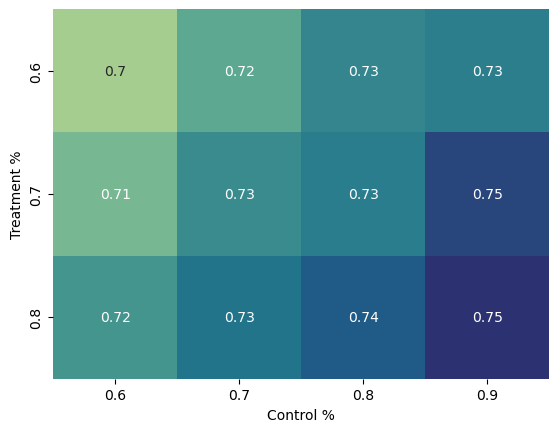

In [50]:
df2 = df[df['Treatment Count'] > 5]
sb.heatmap(pd.pivot_table(df2, values='Average Match Distance', index='Treatment %', columns='Control %'), cbar=False, annot=True, cmap='crest')

# Jensen-Shannon

In [81]:
# Load the data path
hamming_results_path = '/datacommons/carlsonlab/fcw/model_outputs/jensenshannon/'
data_files = os.listdir(hamming_results_path)

# Join the paths into an array so that the dfs could be read
file_paths = zip(repeat(hamming_results_path, len(data_files)), data_files)
file_paths = map("".join, file_paths)
dfs = [pd.read_csv(fps) for fps in file_paths]

# Combine into one dataframe
df = pd.concat(dfs)

# Confirm that there are as many results as expected
# assert len(df) / len(set(df['Neighborhood min dist'])) == 1280

<AxesSubplot: xlabel='Control %', ylabel='Treatment %'>

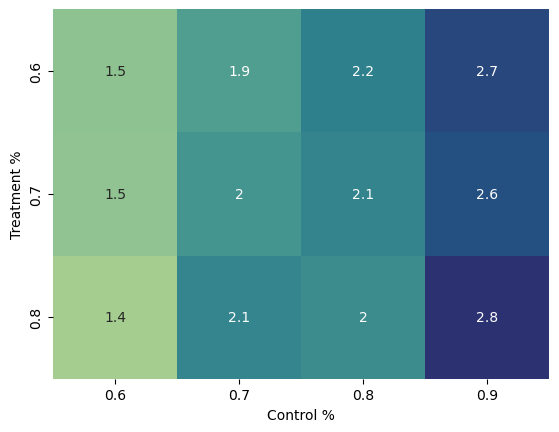

In [85]:
df2 = df[df['Treatment Count'] > 5]
df2 = df2[df2['Treatment/Control Radius'] == 20]
sb.heatmap(pd.pivot_table(df2, values='ATE', index='Treatment %', columns='Control %'), cbar=False, annot=True, cmap='crest')

In [57]:
df.head()

,Neighborhood min dist,Num neighbors,Treatment/Control Radius,Treatment %,Control %,Match Radius,Treatment Count,Control Count,ATE,TE Std,Average Match Distance
0,800,5,20,0.6,0.6,0.5,113,113,1.591858,1.374059,0.197568
1,800,5,20,0.6,0.6,1.0,113,113,1.780531,1.433120,0.195955
2,800,5,20,0.6,0.6,1.5,113,113,1.588673,1.416644,0.194748
3,800,5,20,0.6,0.6,2.0,113,113,1.667699,1.343208,0.194303
4,800,5,20,0.6,0.7,0.5,112,112,2.079196,1.428248,0.199665


# KLD

In [67]:
# Load the data path
hamming_results_path = '/datacommons/carlsonlab/fcw/model_outputs/kl_divergence/'
data_files = os.listdir(hamming_results_path)

# Join the paths into an array so that the dfs could be read
file_paths = zip(repeat(hamming_results_path, len(data_files)), data_files)
file_paths = map("".join, file_paths)
dfs = [pd.read_csv(fps) for fps in file_paths]

# Combine into one dataframe
df = pd.concat(dfs)

# Confirm that there are as many results as expected

<AxesSubplot: xlabel='Control %', ylabel='Treatment %'>

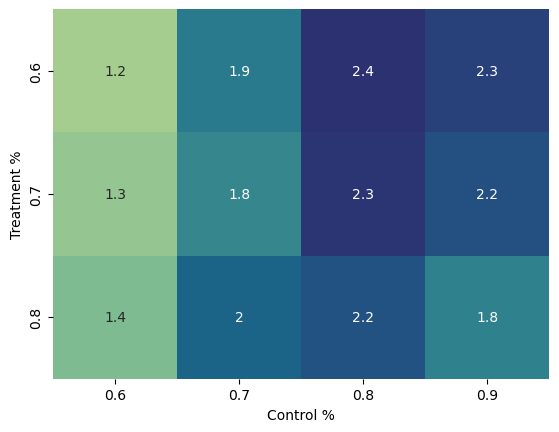

In [68]:
df2 = df[df['Treatment Count'] > 5]
df2 = df2[df2['Treatment/Control Radius'] == 20]
sb.heatmap(pd.pivot_table(df2, values='ATE', index='Treatment %', columns='Control %'), cbar=False, annot=True, cmap='crest')

<AxesSubplot: xlabel='Control %', ylabel='Treatment %'>

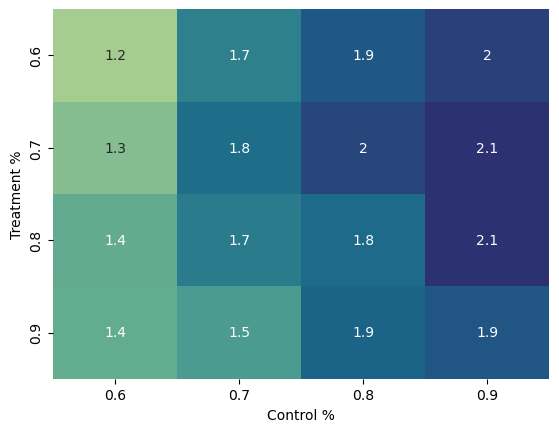

In [10]:
df2 = df[df['Treatment Count'] > 5]
sb.heatmap(pd.pivot_table(df2, values='ATE', index='Treatment %', columns='Control %'), cbar=False, annot=True, cmap='crest')

<AxesSubplot: xlabel='ATE', ylabel='Density'>

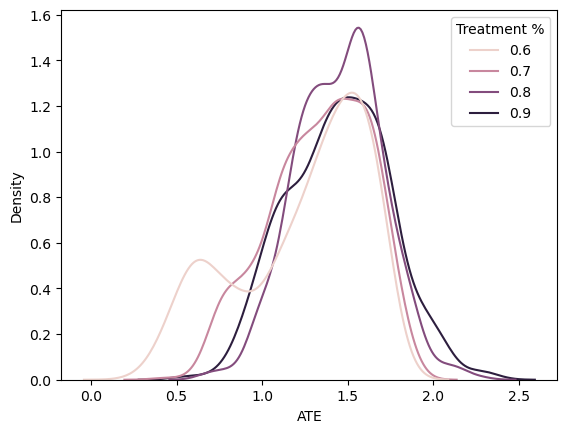

In [27]:
df3 = df2[df2['Control %'] == 0.6]
sb.kdeplot(df3, x='ATE', hue='Treatment %', common_norm=False)

<AxesSubplot: xlabel='ATE', ylabel='Density'>

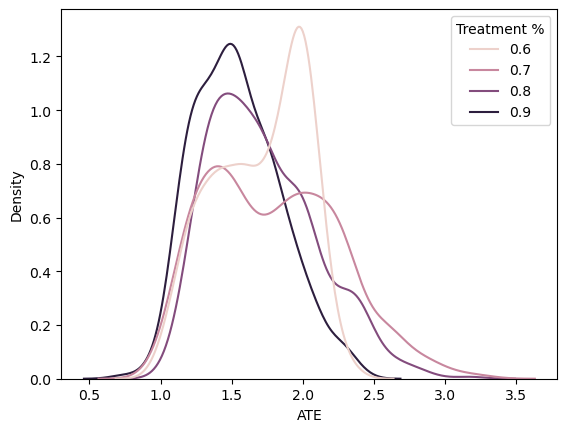

In [26]:
df3 = df2[df2['Control %'] == 0.7]
sb.kdeplot(df3, x='ATE', hue='Treatment %', common_norm=False)

<AxesSubplot: xlabel='ATE', ylabel='Density'>

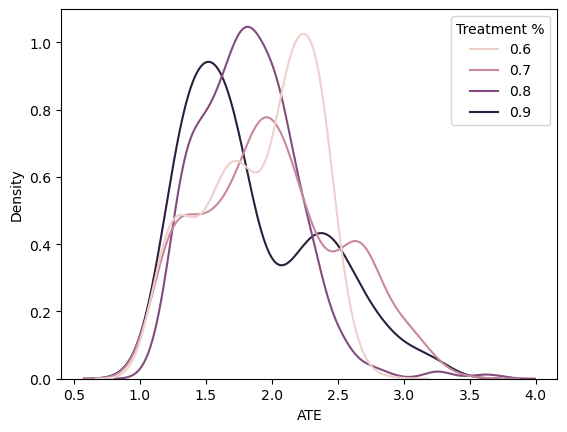

In [25]:
df3 = df2[df2['Control %'] == 0.8]
sb.kdeplot(df3, x='ATE', hue='Treatment %', common_norm=False)

<AxesSubplot: xlabel='ATE', ylabel='Density'>

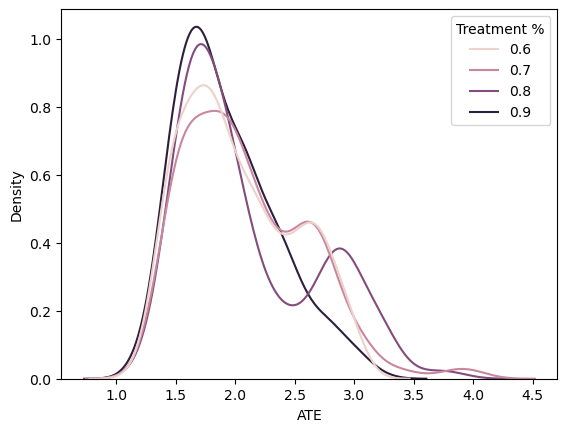

In [24]:
df3 = df2[df2['Control %'] == 0.9]
sb.kdeplot(df3, x='ATE', hue='Treatment %', common_norm=False)